[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/aim-lab/PVBM/blob/main/pvbmtutorial.ipynb)

# PVBM Tutorial

If you are using colab, install the pvbm library by uncommenting the following cell

## Import the libraries

In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Download the example images

In [21]:
# import os

# os.system('wget -P images https://raw.githubusercontent.com/aim-lab/PVBM/main/images/{} > /dev/null 2>&1'.format(image1))
# os.system('wget -P images https://raw.githubusercontent.com/aim-lab/PVBM/main/images/{} > /dev/null 2>&1'.format(image2))
# print("Images downloaded successfully")

In [22]:
import cv2
import os 
from PIL import Image,ImageFilter #Import Pillow library to load the images
import numpy as np #Import numpy
import matplotlib.pyplot as plt #Import matplotlib library for visualization
from skimage.morphology import skeletonize,square,dilation #Import functions to compute morphological operations

## Load an image

In [23]:

# segmentation_path = "images/"+image1 #replace image1 by image2 if you want to use the second example
img_name = '0005.png'
Fundus_img_pth = os.path.join('./Results/M0/images',img_name)
AV_segmentation_path = image1 = os.path.join('./Results/M2/artery_vein/raw/',img_name)
AV_mask = cv2.imread(AV_segmentation_path)
Fundus_img = cv2.imread(Fundus_img_pth)

mask_V = cv2.add(AV_mask[:,:,0],AV_mask[:,:,1])
mask_A = cv2.add(AV_mask[:,:,2],AV_mask[:,:,1])

src_mask_V = mask_V.copy()
src_mask_A = mask_A.copy()
# AV_segmentation_path = image1 = '/home/zack/Desktop/workspace/vessel/RETA/RAVIR/train/training_masks/IR_Case_022.png'
# AV_mask = cv2.imread(AV_segmentation_path,0)

# mask_V = np.where(AV_mask==255,255,0).astype(np.uint8)
# mask_A = np.where(AV_mask==128,255,0).astype(np.uint8)


Text(0.5, 1.0, 'Artery')

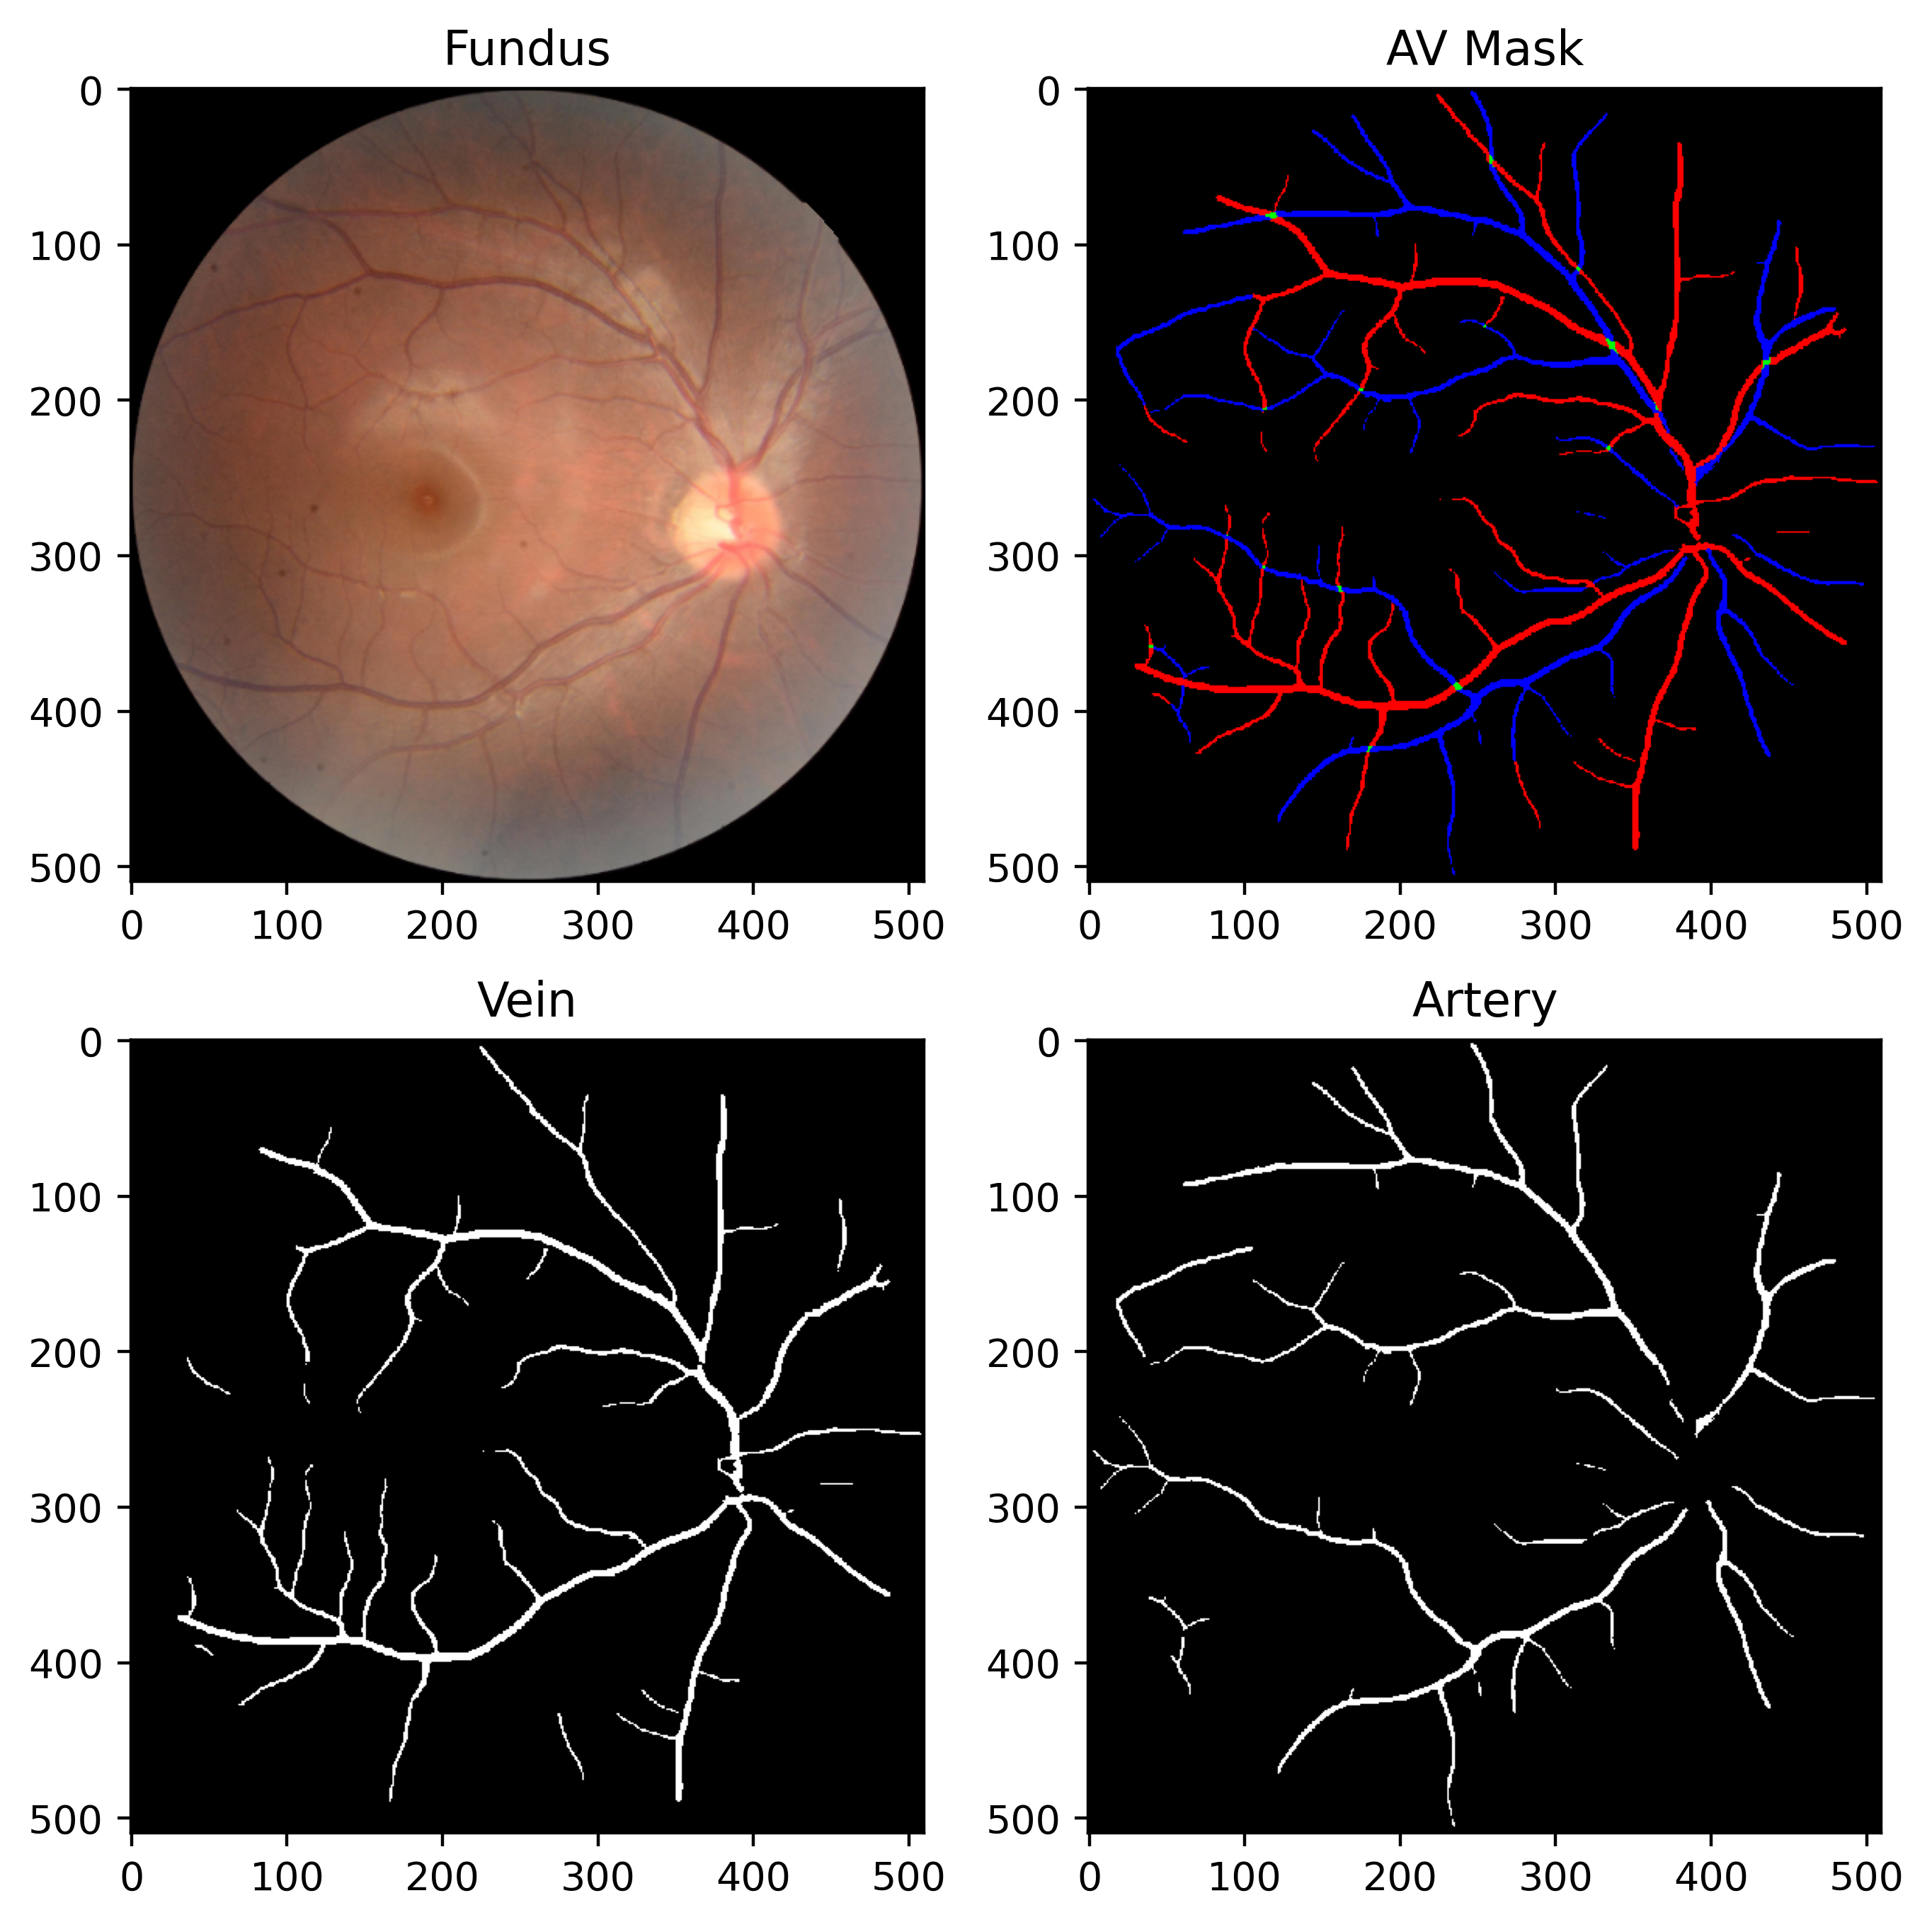

In [24]:
plt.figure(figsize=(8,8),dpi=400)
plt.subplot(221)
plt.imshow(Fundus_img[:,:,::-1])
plt.title("Fundus")

plt.subplot(222)
plt.imshow(AV_mask)
plt.title("AV Mask")
# plt.show()
plt.subplot(223)
plt.imshow(mask_V,cmap = "gray") #Display the segmentation
plt.title("Vein")
# plt.show()
plt.subplot(224)
plt.imshow(mask_A,cmap = "gray") #Display the segmentation
plt.title("Artery")
# plt.show()


In [25]:
## fill the break line by dilate and erode 
##
kernel = np.ones((5,5), np.uint8)  # note this is a horizontal kernel

mask_V = cv2.dilate(mask_V, kernel, iterations=2)
mask_V=cv2.erode(mask_V,kernel,iterations=1)
# cv2.imwrite('open_v.png',mask_V)

mask_A = cv2.dilate(mask_A, kernel, iterations=2)
mask_A=cv2.erode(mask_A,kernel,iterations=1)
# cv2.imwrite('open_v.png',mask_V)

Text(0.5, 1.0, 'Artery')

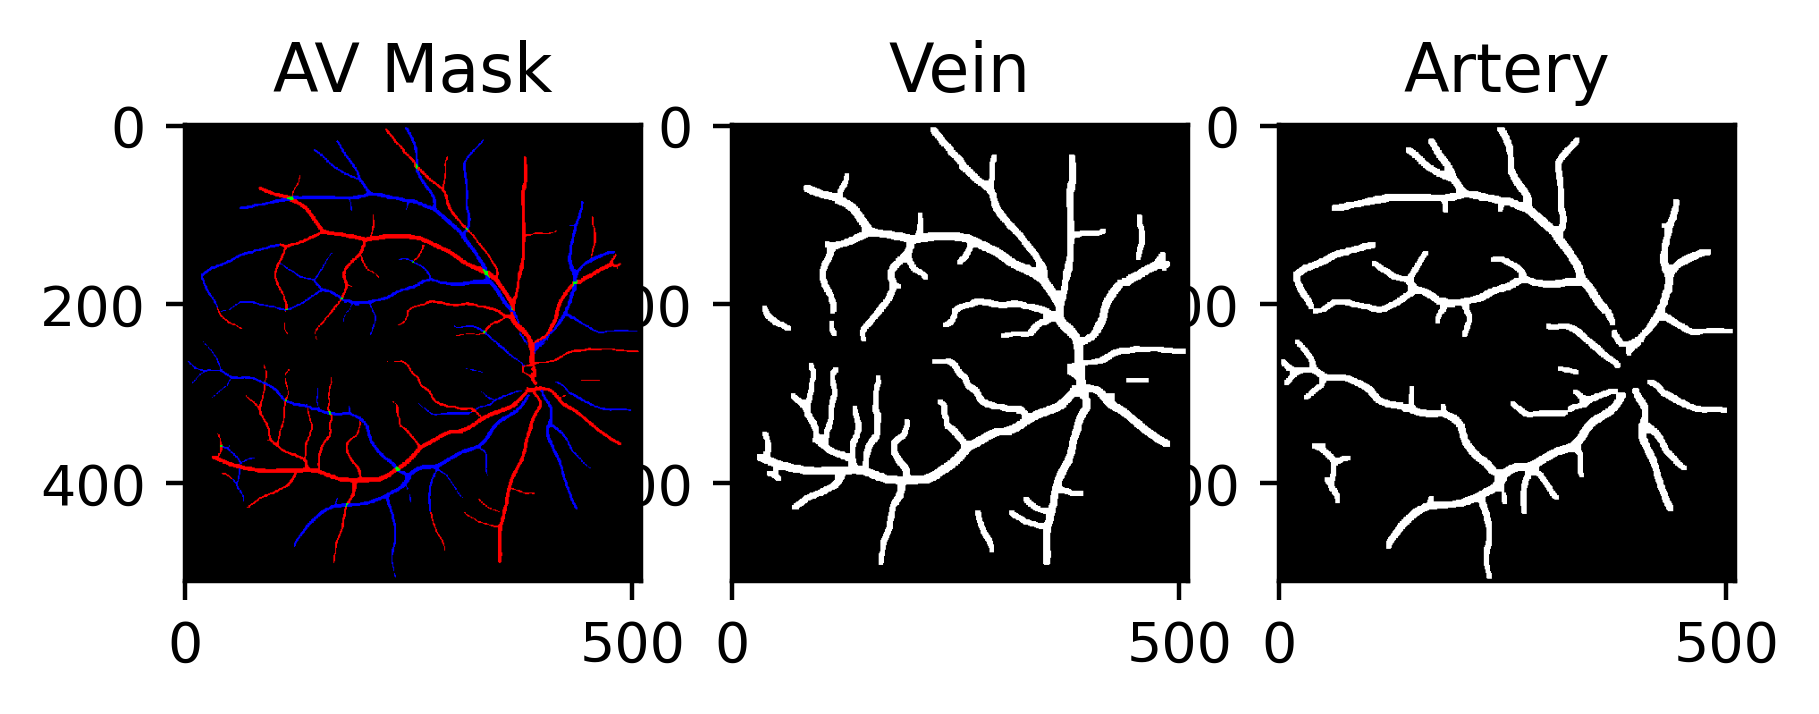

In [26]:
plt.figure(figsize=(5,15),dpi=400)
plt.subplot(131)
plt.imshow(AV_mask)
plt.title("AV Mask")
# plt.show()
plt.subplot(132)
plt.imshow(mask_V,cmap = "gray") #Display the segmentation
plt.title("Vein")
# plt.show()
plt.subplot(133)
plt.imshow(mask_A,cmap = "gray") #Display the segmentation
plt.title("Artery")
# plt.show()


In [27]:
## Skeleton and remove small branches
from PVBM.helpers.skeleton import sk_skeletonize,filter_over
from plantcv import plantcv as pcv

skel_V = filter_over(sk_skeletonize(mask_V))
skel_A = filter_over(sk_skeletonize(mask_A))

skel_V,segmented_img, segment_objects = pcv.morphology.prune(skel_img=skel_V, size=15)
skel_A,segmented_img, segment_objects = pcv.morphology.prune(skel_img=skel_A, size=15)
        

Text(0.5, 1.0, 'Artery')

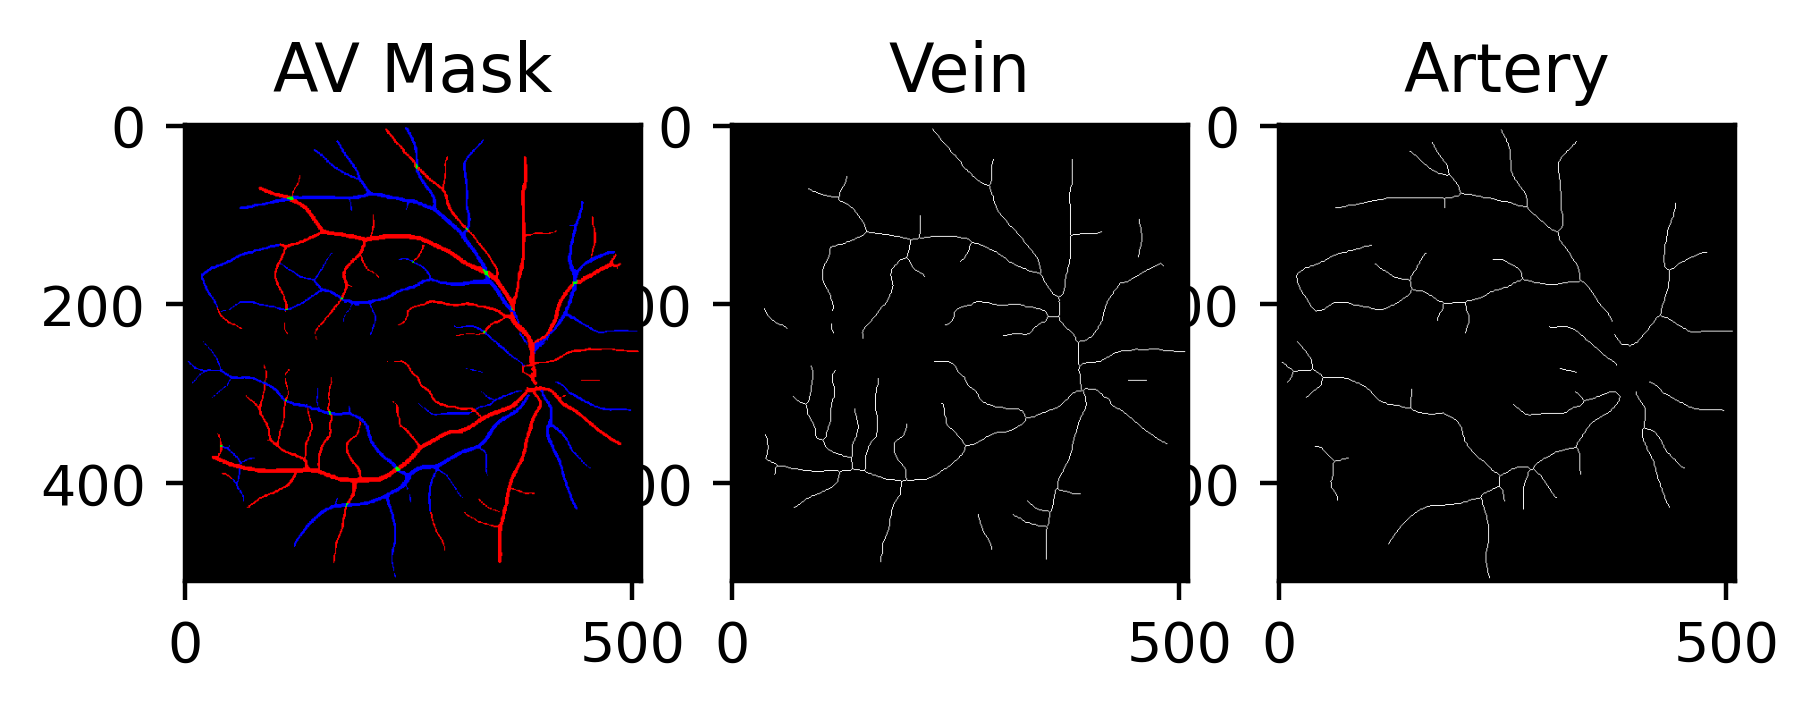

In [28]:
plt.figure(figsize=(5,15),dpi=400)
plt.subplot(131)
plt.imshow(AV_mask)
plt.title("AV Mask")
# plt.show()
plt.subplot(132)
plt.imshow(skel_V,cmap = "gray") #Display the segmentation
plt.title("Vein")
# plt.show()
plt.subplot(133)
plt.imshow(skel_A,cmap = "gray") #Display the segmentation
plt.title("Artery")
# plt.show()

In [29]:
#### remove optic in skeleton
from PVBM.helpers.main_branch import remove_optic,two_main_branch,remove_optic_cup
optic_mask_pth = os.path.join('./Results/M2/optic_disc_cup/raw/',img_name)
optic_mask = cv2.imread(optic_mask_pth,0)

skel_A = remove_optic(skel_A,optic_mask)
skel_V = remove_optic(skel_V,optic_mask)
# skel_A = remove_optic_cup(skel_A,optic_mask)
# skel_V = remove_optic_cup(skel_V,optic_mask)


skel_A = two_main_branch(skel_A)
skel_V = two_main_branch(skel_V)

Total connected trees: 10
Total connected trees: 10


Text(0.5, 1.0, 'Artery')

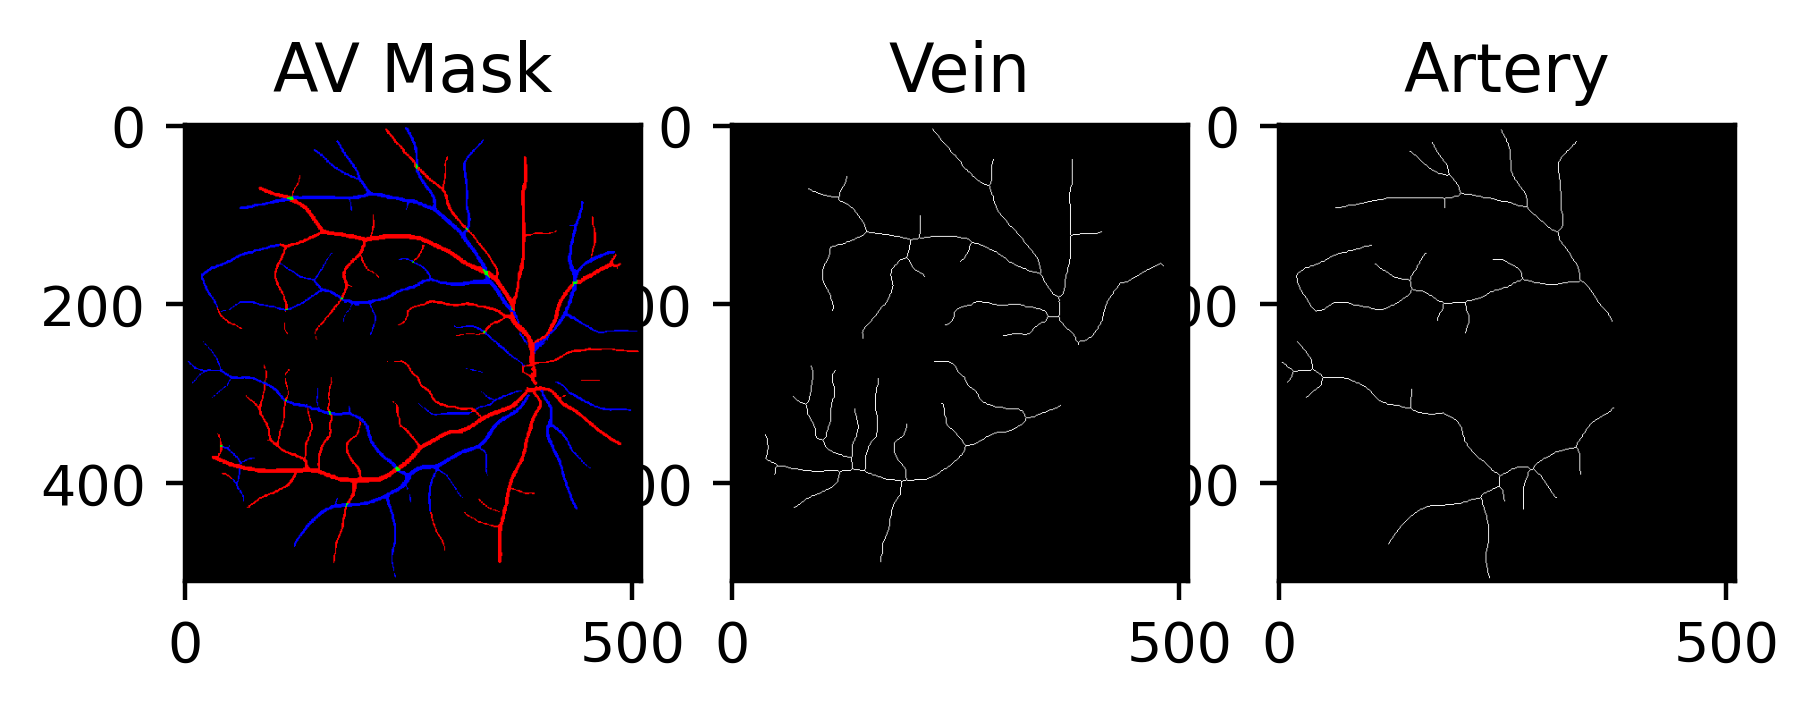

In [30]:
plt.figure(figsize=(5,15),dpi=400)
plt.subplot(131)
plt.imshow(AV_mask)
plt.title("AV Mask")
# plt.show()
plt.subplot(132)
plt.imshow(skel_V[0]+skel_V[1],cmap = "gray") #Display the segmentation
plt.title("Vein")
# plt.show()
plt.subplot(133)
plt.imshow(skel_A[0]+skel_A[1],cmap = "gray") #Display the segmentation
plt.title("Artery")
# plt.show()

In [31]:
# t = skel_V.copy()

#### terminals points (end points, intersction points)
from PVBM.helpers.terminals import get_terminals_hitmiss,show_terminals

skel_V_0 = skel_V[0]
skel_V_1 = skel_V[1]
skel_A_0 = skel_A[0]
skel_A_1 = skel_A[1]

skel_V = skel_V[0]+skel_V[1]
skel_A = skel_A[0]+skel_A[1]

b_skel_V = np.where(skel_V==0,0,1).astype(np.uint8)
b_skel_A = np.where(skel_A==0,0,1).astype(np.uint8)

b_skel_V_0 = np.where(skel_V_0==0,0,1).astype(np.uint8)
b_skel_V_1 = np.where(skel_V_1==0,0,1).astype(np.uint8)
b_skel_A_0 = np.where(skel_A_0==0,0,1).astype(np.uint8)
b_skel_A_1 = np.where(skel_A_1==0,0,1).astype(np.uint8)


# b_skel_V = b_skel_V.astype(np.uint8) # must be blaack and white thin network image
# b_skel_A = b_skel_A.astype(np.uint8)

e_points_V,i_points_V = get_terminals_hitmiss(b_skel_V)
e_points_A,i_points_A = get_terminals_hitmiss(b_skel_A)

e_points_V_0,i_points_V_0 = get_terminals_hitmiss(b_skel_V_0)
e_points_V_1,i_points_V_1 = get_terminals_hitmiss(b_skel_V_1)
e_points_A_0,i_points_A_0 = get_terminals_hitmiss(b_skel_A_0)
e_points_A_1,i_points_A_1 = get_terminals_hitmiss(b_skel_A_1)


Text(0.5, 1.0, 'Artery')

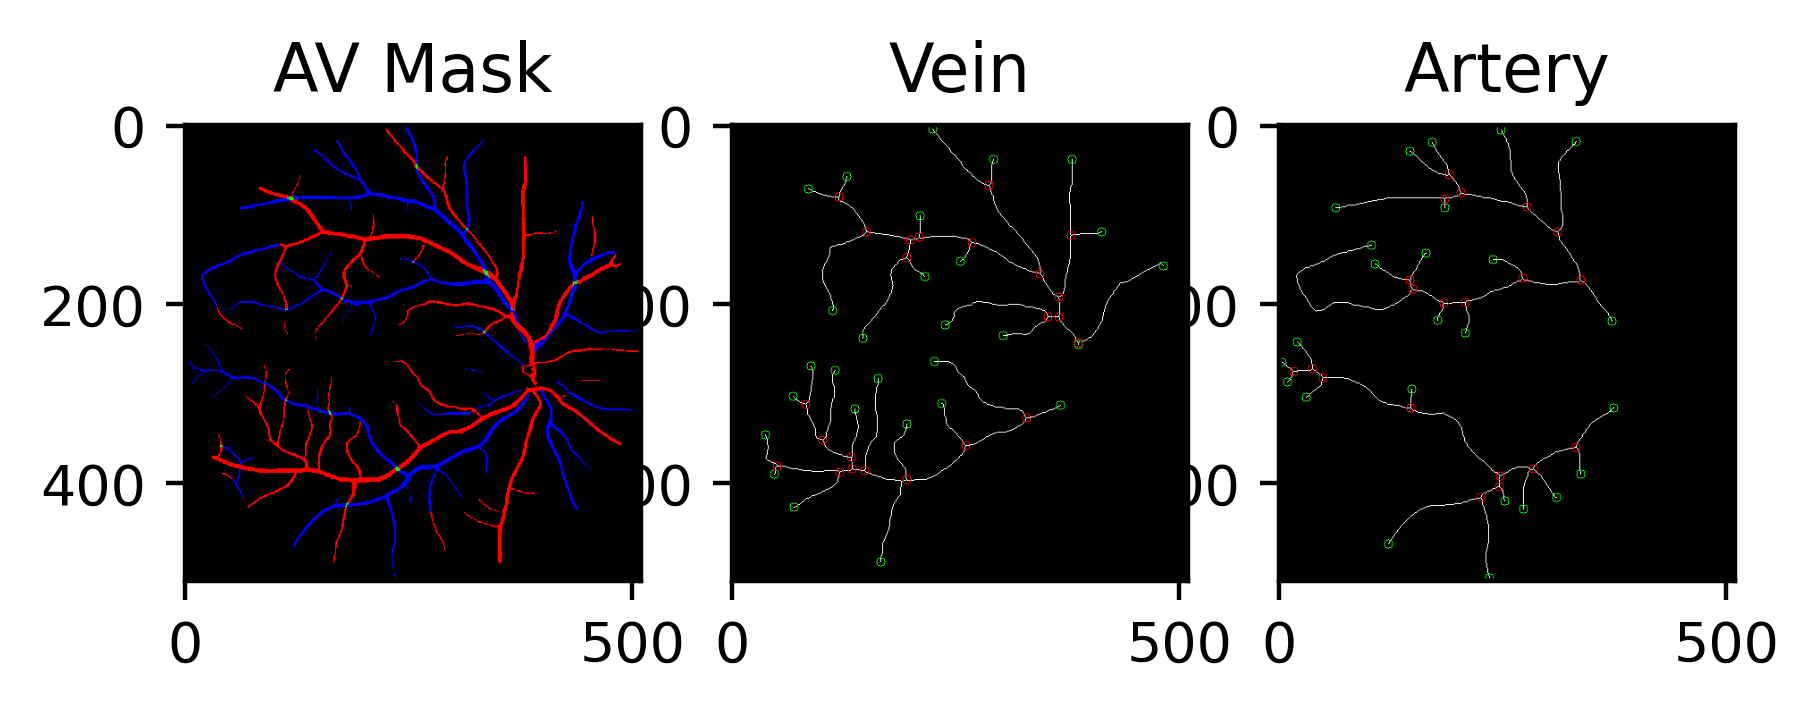

In [32]:

terminals_V = show_terminals(skel_V,e_points_V,i_points_V)
terminals_A = show_terminals(skel_A,e_points_A,i_points_A)
plt.figure(figsize=(5,15),dpi=400)
plt.subplot(131)
plt.imshow(AV_mask)
plt.title("AV Mask")
# plt.show()
plt.subplot(132)
plt.imshow(terminals_V) #Display the segmentation
plt.title("Vein")
# plt.show()
plt.subplot(133)
plt.imshow(terminals_A) #Display the segmentation
plt.title("Artery")
# plt.show()

The index of the nearest point to (385, 282) is 14 with a distance of 37.05401462729781.
Building tree...
  constructing tree...
Found 2 neighbors without finding a junction at (111, 136)
removed nodes []
  Strahler order...
  apical distances...
  branch angles...
Done.

RESULTS in mm and degrees
-------------------------
29 nodes, 27 branches 
14 terminal nodes, 14 terminal branches 
15 internal nodes, 13 internal branches 

                      all      |     terminals   |  non-terminals  |    fertile
      parameter   avg    std   |    avg    std   |    avg    std   |   avg    std
            dia   0.06   0.04  |    0.05   0.02  |    0.06   0.06  |   -1.00  -1.00
     apicaldist   1.31   0.48  |    1.43   0.36  |    1.20   0.54  |   -1.00  -1.00
   branchlength   1.33   0.92  |    1.57   0.99  |    1.09   0.76  |   -1.00  -1.00
 branchlength_e   1.21   0.80  |    1.41   0.84  |    1.01   0.70  |   -1.00  -1.00
          alpha 124.64  29.78  |  125.43  32.78  |  123.79  26.13  |   

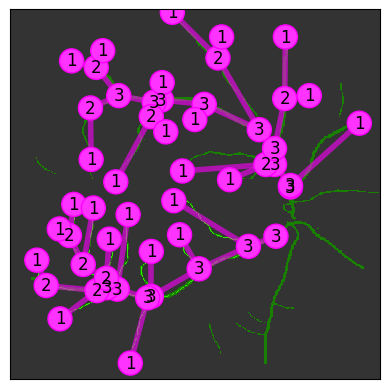

In [33]:

# %xmode
# %debug
from PVBM.helpers.vascular2graph import *
px_mm = 43.0
root = None #(417,196)
select = None

from PVBM.helpers.main_branch import optic_center
optic_center_point,OD = optic_center(optic_mask)
# img = mh.imread(filename)


# t_skel = skel_V_0

skel_V_list = [skel_V_0,skel_V_1]
e_points_V_list = [e_points_V_0,e_points_V_1]
i_points_V_list = [i_points_V_0,i_points_V_1]
img = src_mask_V.copy()
G_V = []
roots=[]
for t_skel,t_e_points_V,t_i_points_V in zip(skel_V_list,e_points_V_list,i_points_V_list):
    contours, hierarchy = cv2.findContours(t_skel, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    t_e_points = [(p[0],p[1]) for p in t_e_points_V]
    t_i_points = [(p[0],p[1]) for p in t_i_points_V]
    

    root = None
    if root == None:
        root = find_root_based_optic(t_e_points+t_i_points,optic_center_point)
    else:
        if root not in t_e_points+t_i_points:
            newroot = findClosest(t_e_points+t_i_points, root)
            print('Moving the root to a node in the tree. New root is', str(newroot), 'old root was', str(root), 'distance', dist(newroot, root))     
            root = newroot
    roots.append(root)       
    # t_skel = np.ma.masked_where(t_skel==0 or t_skel, t_skel)
    t_skel = np.ma.masked_where(t_skel==0, t_skel)

    superposed = False
    contour = findContour(img)

    if(len(contours)>2):
        superposed = True
        print("image with loops detected, useless to use an older graph, constructing the graph")
        G = buildGraph(img, t_skel,root,t_e_points,t_i_points)
        if(len(contours)>2):
            img,t_skel,skel2,cutPoints = loopSolution(G,t_skel,img,contours,root)
            G = buildGraph(img, t_skel,root,t_e_points,t_i_points)
            # contour = findContour(img)
            markCutPoints(G,cutPoints,20)
    else:
        # # read in the graph from a previous run, if it exists
        # try:
        #     pkl_path = path_basename+'_graph.pkl'
        #     if os.path.exists(pkl_path):
        #         with open() as f:
        #             G = pickle.load(f)
        #         print('Loaded graph from ' + path_basename + '_graph.pkl')
        #         print('Graphs created by an older version of this software wont load, please delete ' + path_basename + '_graph.pkl file and retry in case of error.')
        #     else:
        #         G = buildGraph(img, t_skel,root,t_e_points,t_i_points)
        # except:
        #     # could not read the graph. Constructing it now
        #     G = buildGraph(img, t_skel,root,t_e_points,t_i_points)
        G = buildGraph(img, t_skel,root,t_e_points,t_i_points)

    ### Prune only in 2.5 OD zone ##########################
    ########################################################
    # calculate_distances_and_prune(G,root,int(OD*2.5))

    ########################################################
    width = t_skel.shape[1]
    height = t_skel.shape[0]

    plt.axis((0,width,height,0))
    plt.imshow(~img, cmap=leaf_colors, interpolation="nearest")
    plt.imshow(t_skel, cmap=skel_colors,  interpolation="nearest")


    # handles to plot elements
    nodes = None
    edges = None
    node_labels = None
    edge_labels = None

    rad=[]
    # from IPython.core.debugger import set_trace

    plot_graph(G,nodes,edges,node_labels,edge_labels,rad)
    # set_trace()
    a,b = report(G,root,px_mm,'basename')
    G_V.append(G)
    # print(a,b)

root (387, 245)
The Strahler Order of Root:  3
nodes: <generator object dfs_preorder_nodes.<locals>.<genexpr> at 0x7085005a5930>
number of trunk and edge branch node:  1 5
all branch theta angle: [{(111, 136): 33.95997498538472, (119, 80): 41.112090439166934}]
all edge theta angle: [{(303, 235): 22.782405730481685, (238, 223): 4.474896506246068}, {(215, 169): 54.91275144672382, (146, 238): 17.255904319726312}, {(85, 71): 36.69332178130131, (128, 57): 59.85082051768619}, {(224, 4): 15.068488159492233, (292, 38): 39.71391887231505}, {(413, 119): 71.82063285937616, (380, 38): 10.795493434882417}]
root (367, 313)
The Strahler Order of Root:  3
nodes: <generator object dfs_preorder_nodes.<locals>.<genexpr> at 0x7085005a5930>
number of trunk and edge branch node:  2 6
all branch theta angle: [{(111, 136): 33.95997498538472, (119, 80): 41.112090439166934}, {(120, 388): 24.075498255078855, (133, 371): 77.47119229084849}]
all edge theta angle: [{(303, 235): 22.782405730481685, (238, 223): 4.474

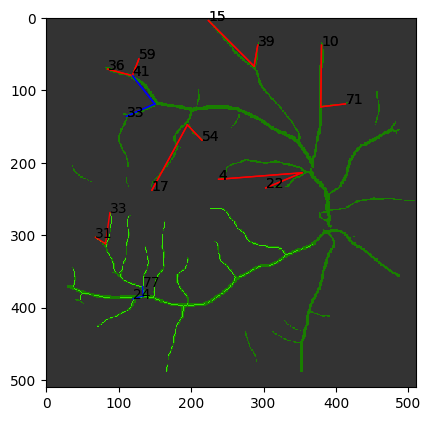

In [34]:

import networkx as nx

# G_t = G.copy()
last_trunk_nodes_Vein = []

trunk_branch_node=[]
trunk_branch_angle=[]
trunk_branch_diameter=[]
edge_branch_node=[]
edge_branch_angle=[]
edge_branch_diameter=[]

for G_t,root in zip(G_V,roots):
    nodes = nx.dfs_preorder_nodes(G_t, root)
    # edges = nx.dfs_edges(G_t,root)
    edges = G_t.edges()

    print('root',root)
    last_trunk_node = []
    truck_branch = []
    leaf_branch = []
    # for n in G:
    #     print('n',n)
    #     print(G[n])
    #     for n2 in G[n]:
    #         print('n2',n2)
    order_of_root = G_t.nodes[root]['Strahler']
    for p in nodes:
        # print(p)
        if G_t.nodes[p]['Strahler']==order_of_root:
            last_trunk_node.append(p)
    last_trunk_nodes_Vein.append(last_trunk_node[-1])
    # for e in edges: 
    #     if G_t.edges[e[0],e[1]]['Strahler']==1:
    #             # print(G_t.edges[e[0],e[1]].keys())
    #             ## 'theta', 'alpha', 'alpha_e'
    #             print((G_t.edges[e[0],e[1]]['alpha'],G_t.edges[e[0],e[1]]['alpha_e']))#*(180.0/np.pi))
    #             print((G_t.edges[e[0],e[1]]['alpha']+G_t.edges[e[0],e[1]]['alpha_e'])*(180.0/np.pi))#*(180.0/np.pi))
    #             # print(G_t.edges[e[0],e[1]]['theta'])



    nodes = nx.dfs_preorder_nodes(G_t, root) ## each time you use, need dfs
    order_of_root = G_t.nodes[root]['Strahler']
    print("The Strahler Order of Root: ",order_of_root)
    print('nodes:',nodes)
    for n in nodes: 
        if G_t.nodes[n]['Strahler'] == order_of_root:
            n_parent = G_t.nodes[n]['parent']
            num_branch = 0
            branch_angle = {}
            branch_diameter = {}
            for n_2 in G_t[n]: # neighbor
                if n_2 == n_parent and n_2 is not None:
                    pp = G_t.nodes[n_2]['parent']
                    if pp is None:
                        continue
                    branch_diameter[(*n_2,'parent')] = G_t.edges[n_2,pp]['W_mean']
                elif n_2 != n_parent and n_2 is not None and G_t.nodes[n_2]['Strahler']==(order_of_root-1):
                    num_branch+=1
                    branch_angle[n_2] = (180.0-G_t.edges[n,n_2]['alpha_e']*(180.0/np.pi))
                    branch_diameter[n_2]=G_t.edges[n,n_2]['W_mean']
            # if num_branch == len(G_t[n])-1 and n != root:
            if num_branch == 2 and n != root:
                trunk_branch_node.append(n)
                trunk_branch_angle.append(branch_angle)
                trunk_branch_diameter.append(branch_diameter)
                # print(G_t.nodes[n_2]['parent'])
                # if G_t.nodes[n_2]['Strahler'] == order_of_root:   
                # if G_t.edges[n,n_2]['Strahler'] 
        elif G_t.nodes[n]['Strahler'] == 2:
            n_parent = G_t.nodes[n]['parent']
            num_branch = 0
            branch_angle = {}
            branch_diameter={}
            for n_2 in G_t[n]: # neighbor
                if n_2 == n_parent and n_2 is not None:
                    pp = G_t.nodes[n_2]['parent']
                    if pp is None:
                        continue
                    branch_diameter[(*n_2,'parent')] = G_t.edges[n_2,pp]['W_mean']
                elif n_2 != n_parent and n_2 is not None and G_t.nodes[n_2]['Strahler']==1:
                    num_branch+=1
                    branch_angle[n_2] = (180.0-G_t.edges[n,n_2]['alpha_e']*(180.0/np.pi))
                    branch_diameter[n_2]=G_t.edges[n,n_2]['W_mean']
                    ### W_mean
                    
            # if num_branch == len(G_t[n])-1 and n != root:
            if num_branch == 2 and n != root:
                edge_branch_node.append(n)
                edge_branch_angle.append(branch_angle)
                edge_branch_diameter.append(branch_diameter)
                # print(G_t.nodes[n_2]['parent'])
                # if G_t.nodes[n_2]['Strahler'] == order_of_root:   
                # if G_t.edges[n,n_2]['Strahler']         
    print('number of trunk and edge branch node: ',len(trunk_branch_node),len(edge_branch_node))  
    print('all branch theta angle:',trunk_branch_angle) 
    print('all edge theta angle:',edge_branch_angle)          
    x = [root[0],last_trunk_node[-1][0]] 
    y = [root[1],last_trunk_node[-1][1]]  


    pos={}
    for p in G.nodes:
        pos[p] = p

    # G_t.add_edge(root,last_trunk_node[-1])


    plt.axis((0,width,height,0))
    plt.imshow(~img, cmap=leaf_colors, interpolation="nearest")
    plt.imshow(t_skel, cmap=skel_colors,  interpolation="nearest")

    # nodes = None
    # edges = None
    # node_labels = None
    # edge_labels = None
    # plot_graph(G_t,nodes,edges,node_labels,edge_labels,rad)
    # # nx.draw_networkx_edges(G_t,pos,edge_color='g')

    # edge_branch_x = [list(branch.keys()) for branch in edge_branch_angle]
    # print(edge_branch_x)
    for bchild,bf in zip(edge_branch_angle,edge_branch_node):
        for bkey in bchild.keys():
            x = [bkey[0],bf[0]]
            y = [bkey[1],bf[1]]
            strangle = str(int(bchild[bkey]))
            plt.plot(x,y,color="red", linewidth=1)
            plt.text(bkey[0],bkey[1],strangle)
        
    for bchild,bf in zip(trunk_branch_angle,trunk_branch_node):
        for bkey in bchild.keys():
            x = [bkey[0],bf[0]]
            y = [bkey[1],bf[1]]
            strangle = str(int(bchild[bkey]))
            plt.plot(x,y,color="blue", linewidth=1)
            plt.text(bkey[0],bkey[1],strangle)

    # plt.plot(x,y)

(510, 510, 3) (510, 510, 3)


([], [])

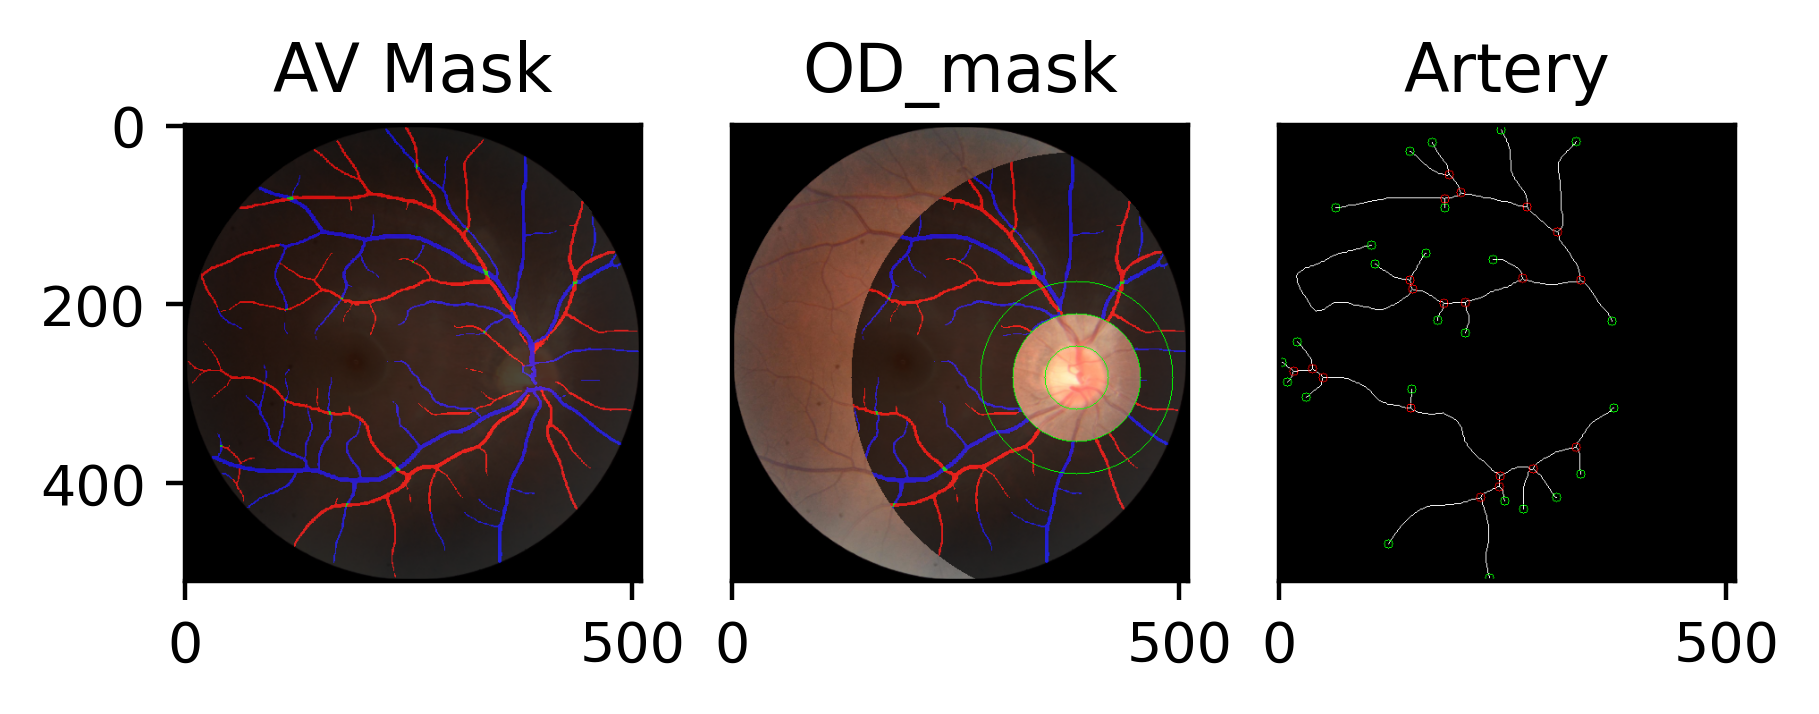

In [35]:




print(Fundus_img.shape,AV_mask.shape)
combine = cv2.addWeighted(Fundus_img,0.3,AV_mask,0.7,0)
# OD_mask = np.zeros((Fundus_img.shape[0],Fundus_img.shape[1]))
OD_mask = np.zeros_like(Fundus_img)
Fundus_Area_Mask = np.where(Fundus_img==0,0,1)
# optic_center_point,OD 
# 确定环的中心坐标
# center = (128, 128)

# 环的内外半径
inner_radius = 50
outer_radius = 100

# 画一个环

cv2.circle(OD_mask, optic_center_point, int(OD*3.5), (1,1,1), thickness=-1)  # wai圈
cv2.circle(OD_mask, optic_center_point, int(OD), (0,0,0), thickness=-1)  # nei圈

FundsWithOD = np.where(OD_mask==0,Fundus_img,combine)
# FundsWithOD = OD_mask*combine+(1-OD_mask)*Fundus_img
FundsWithOD = FundsWithOD.astype(np.uint8)

cv2.circle(FundsWithOD, optic_center_point, int(0.5*OD), (0,255,0), thickness=1)  # nei圈
cv2.circle(FundsWithOD, optic_center_point, int(OD*1.5), (0,255,0), thickness=1)  # wai圈
cv2.circle(FundsWithOD, optic_center_point, int(OD), (0,255,0), thickness=1)  # nei圈

FundsWithOD = FundsWithOD*Fundus_Area_Mask



plt.figure(figsize=(5,15),dpi=400)
plt.subplot(131)
plt.imshow(combine[:,:,::-1])
plt.title("AV Mask")
# plt.show()
plt.subplot(132)
plt.imshow(FundsWithOD[:,:,::-1]) #Display the segmentation
plt.title("OD_mask")
# plt.show()
plt.yticks([])  # 去掉y轴
plt.subplot(133)
plt.imshow(terminals_A) #Display the segmentation
plt.title("Artery")
# plt.show()

# plt.xticks([])  # 去掉x轴
plt.yticks([])  # 去掉y轴
# plt.axis('off')  # 去掉坐标轴
# plt.show()

(510, 510, 3)
191.5876047 264.6186816
Main angle of vessel tree: 56.861406318048296
(510, 510, 3)
Number of trunk branch,Average angle different of trunk branch:  2 30.273904744775926
Average trunk branch coefficient:  1.1452391331823044
Number fo edge branch,Average angle different of edge branch:  6 27.714426587588253
Average edge branch coefficient:  0.8335707967397227


([], [])

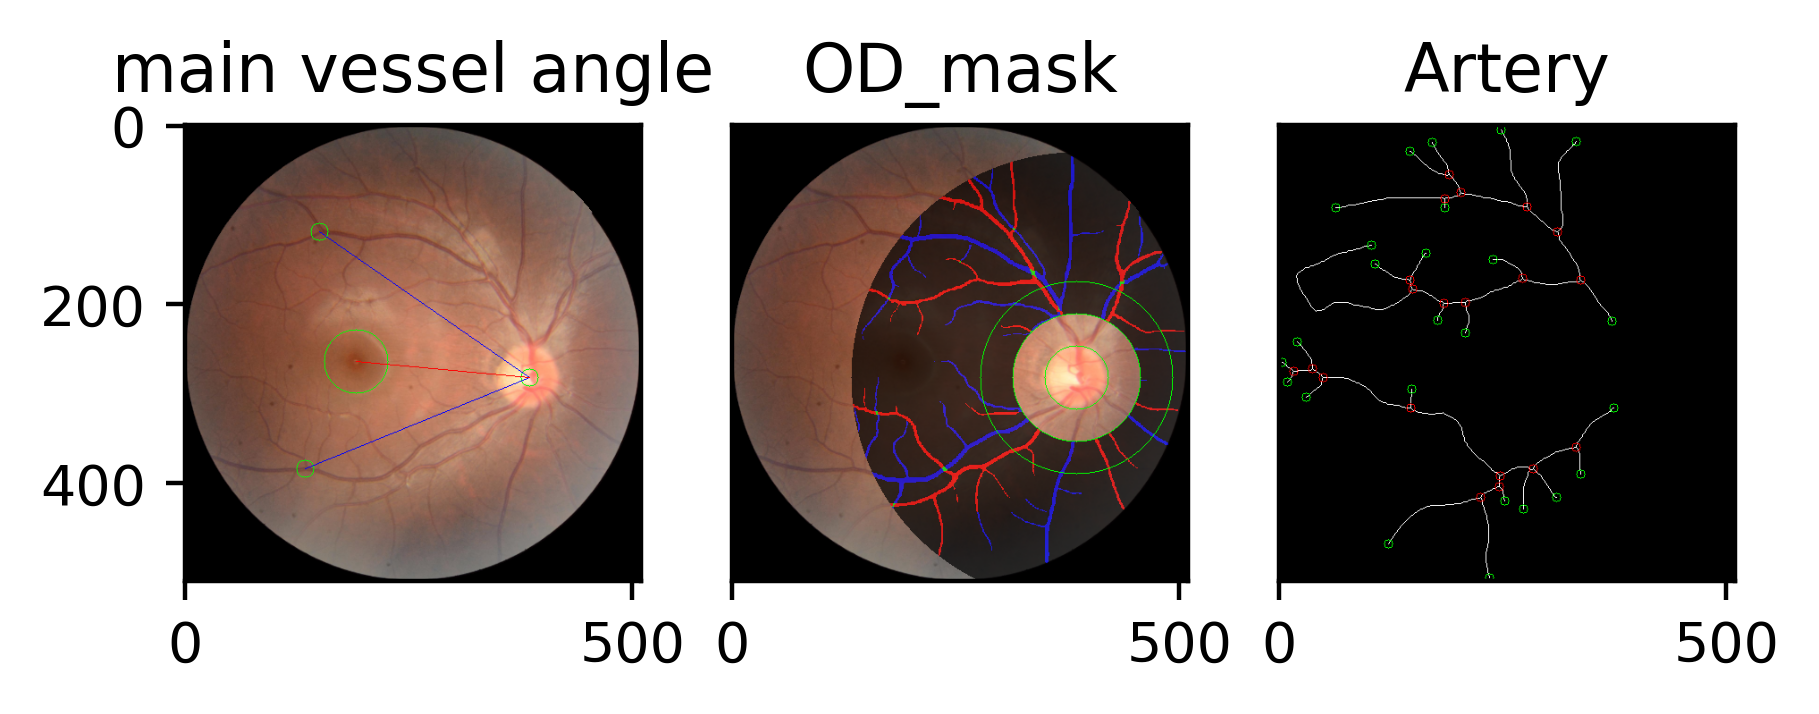

In [36]:
### show fovea location
import pandas as pd
def rescale_label(a,b):
    div = [ai*bi for ai,bi in zip(a,b)]
    return div
location_csv_file = './Results/M2/Fovea/Macular_loc.csv'
df = pd.read_csv(location_csv_file)
# print(df['Name'])
img_fovea_loc = df[df['Name'] == img_name]
cx = img_fovea_loc['cx'].values[0]
cy = img_fovea_loc['cy'].values[0]
print(Fundus_img.shape)

cx,cy=rescale_label((cx,cy),Fundus_img.shape[:-1])
Fovea_loc = (int(cx),int(cy))
print(cx,cy)
### show optic diameter

############## save data #######
from PVBM.helpers.vascular2graph import angle
main_vessel_angle = angle(optic_center_point,last_trunk_nodes_Vein[0],last_trunk_nodes_Vein[1])*(180.0/np.pi)
print("Main angle of vessel tree:",main_vessel_angle)


img_tmp = Fundus_img.copy()
print(img_tmp.shape)
cv2.circle(img_tmp,optic_center_point,10,color=(0,255,0),thickness=1)
cv2.circle(img_tmp,last_trunk_nodes_Vein[0],10,color=(0,255,0),thickness=1)
cv2.circle(img_tmp,last_trunk_nodes_Vein[1],10,color=(0,255,0),thickness=1)
cv2.line(img_tmp,optic_center_point,last_trunk_nodes_Vein[0],color=[255,0,0],thickness=1)
cv2.line(img_tmp,optic_center_point,last_trunk_nodes_Vein[1],color=[255,0,0],thickness=1)
cv2.circle(img_tmp,Fovea_loc,int(0.5*OD),(0,255,0), thickness=1)
cv2.line(img_tmp,Fovea_loc,optic_center_point,(0,0,255))


trunk_branch_angle_different_list=[]
trunk_branching_coeff_list = []
for ta,td in zip(trunk_branch_angle,trunk_branch_diameter):
    angle_list = list(ta.values())
    angle_different = np.fabs(angle_list[0]-angle_list[1]) 
    trunk_branch_angle_different_list.append(angle_different)
    
    d = 0.0
    d0=0.0000001
    for nkey in td.keys():
        if 'parent' in nkey:
            d0 = td[nkey]*td[nkey]
        else:
            d = d+td[nkey]*td[nkey]
    trunk_branching_coeff_list.append(d/d0)
    # print(angle_different)
print('Number of trunk branch,Average angle different of trunk branch: ',len(trunk_branch_angle_different_list),sum(trunk_branch_angle_different_list)/len(trunk_branch_angle_different_list))
print('Average trunk branch coefficient: ',sum(trunk_branching_coeff_list)/len(trunk_branching_coeff_list))

edge_branch_angle_different_list=[]
edge_branching_coeff_list = []
for ta,td in zip(edge_branch_angle,edge_branch_diameter):
    # for bkey in ta.keys():
        # x = [bkey[0],bf[0]]
        # y = [bkey[1],bf[1]]
    angle_list = list(ta.values())
    angle_different = np.fabs(angle_list[0]-angle_list[1]) 
    edge_branch_angle_different_list.append(angle_different)
    
    d = 0.0
    d0=0.0000001
    for nkey in td.keys():
        if 'parent' in nkey:
            d0 = td[nkey]*td[nkey]
        else:
            d = d+td[nkey]*td[nkey]
    edge_branching_coeff_list.append(d/d0)
    # print(angle_different)
print('Number fo edge branch,Average angle different of edge branch: ',len(edge_branch_angle_different_list),sum(edge_branch_angle_different_list)/len(edge_branch_angle_different_list))
print('Average edge branch coefficient: ',sum(edge_branching_coeff_list)/len(edge_branching_coeff_list))


plt.figure(figsize=(5,15),dpi=400)
plt.subplot(131)
plt.imshow(img_tmp[:,:,::-1])
plt.title("main vessel angle")

# plt.show()
plt.subplot(132)
plt.imshow(FundsWithOD[:,:,::-1]) #Display the segmentation
plt.title("OD_mask")
# plt.show()
plt.yticks([])  # 去掉y轴
plt.subplot(133)
plt.imshow(terminals_A) #Display the segmentation
plt.title("Artery")
# plt.show()

# plt.xticks([])  # 去掉x轴
plt.yticks([])  # 去掉y轴
# plt.axis('off')  # 去掉坐标轴
# plt.show()

In [37]:
# import sys
# sys.path.insert(0,'.')
# from PVBM.GeometricalAnalysis import GeometricalVBMs #Import the geometrical analysis module
# geometricalVBMs = GeometricalVBMs() #Instanciate a geometrical VBM object


# # b_skel_V = np.where(t==0,0,1).astype(np.uint8)
# # print(b_skel_V.shape)
# median_tor, length,chord,arc,connection_dico = geometricalVBMs.compute_tortuosity_length(b_skel_V) 
# #times depends in the resolution of the segmentation (smaller is faster)
# print("The median tortuosity is {}".format(median_tor))
# print("Here is the list containing the arc length of every blood vessels (between two particular points) {}."
#       .format(arc[:3]))
# print("Here is the list containing the chord length of every blood vessels (between two particular points) {}."
#       .format(chord[:3]))
# print("We can recompute the median tortuosity:{} and we can compute the tortuosity index: {}."
#       .format(np.median(np.array(arc)/np.array(chord)), np.sum(arc)/np.sum(chord)))
# print("The length is {}".format(length))

In [38]:
# fig = plt.figure(figsize=(5,5),dpi=800)
# print(len(connection_dico))
# for key,values in connection_dico.items():
#     # print(key,values)
#     x1,y1 = key
#     for value in values:
#         x2,y2 = value[0][0],value[0][1]
#         print(x2,y2)
#         x_ = (x1,x2)
#         y_ = (y1,y2)
#         plt.plot(y_,x_, color="red", linewidth=1)
# plt.imshow(skel_V,cmap = 'gray')
# plt.title('Linear interpolation of the segmentation that was used to compute the length and the tortuosity')
# plt.show()

## Branching angles

The centroid can also be ploted (independent for each subgraph)

Lets extract each subgraph and their centroid

## Fractal Analysis